# <center>Final Project - Team 7<center>
# <center>Prediction of the FIFA Player’s Wage<center>

## Data Preprocessing

In [1]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm
import numpy as np
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('data.csv', decimal = ',')

In [4]:
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


There are some variables we may not use, like IDs, photos and so on. We can remove them from our data and form a new data set for predicting the wage.

In [5]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Work Rate', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Body Type', 'Position', 'Release Clause'])

## Target Variable

In [6]:
df['Wage'].isnull().sum()

0

In [7]:
df['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
5        €340K
6        €420K
7        €455K
8        €380K
9         €94K
10       €205K
11       €355K
12       €125K
13       €285K
14       €225K
15       €205K
16       €205K
17       €145K
18       €240K
19       €240K
20       €315K
21       €200K
22       €130K
23       €300K
24       €215K
25       €100K
26       €255K
27       €285K
28       €315K
29       €165K
         ...  
18177      €1K
18178      €1K
18179      €1K
18180      €1K
18181      €1K
18182      €1K
18183      €1K
18184      €1K
18185      €1K
18186      €1K
18187      €1K
18188      €1K
18189      €1K
18190      €1K
18191      €1K
18192      €1K
18193      €1K
18194      €1K
18195      €1K
18196      €1K
18197      €1K
18198      €1K
18199      €1K
18200      €1K
18201      €1K
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

Then, we find out that the wage column contains the special symbols, we can change them into integer value for convenient.

In [8]:
df['Wage'] = df['Wage'].str.split('€').str[1].str.split('K').str[0]
df['Wage'] = df['Wage'].astype('int64') * 1000

In [9]:
df['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
5        340000
6        420000
7        455000
8        380000
9         94000
10       205000
11       355000
12       125000
13       285000
14       225000
15       205000
16       205000
17       145000
18       240000
19       240000
20       315000
21       200000
22       130000
23       300000
24       215000
25       100000
26       255000
27       285000
28       315000
29       165000
          ...  
18177      1000
18178      1000
18179      1000
18180      1000
18181      1000
18182      1000
18183      1000
18184      1000
18185      1000
18186      1000
18187      1000
18188      1000
18189      1000
18190      1000
18191      1000
18192      1000
18193      1000
18194      1000
18195      1000
18196      1000
18197      1000
18198      1000
18199      1000
18200      1000
18201      1000
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 1820

Then, we can sort it from highest to lowest and plot it as the histogram.

In [10]:
top_wage_player=df.sort_values('Wage',ascending=False)

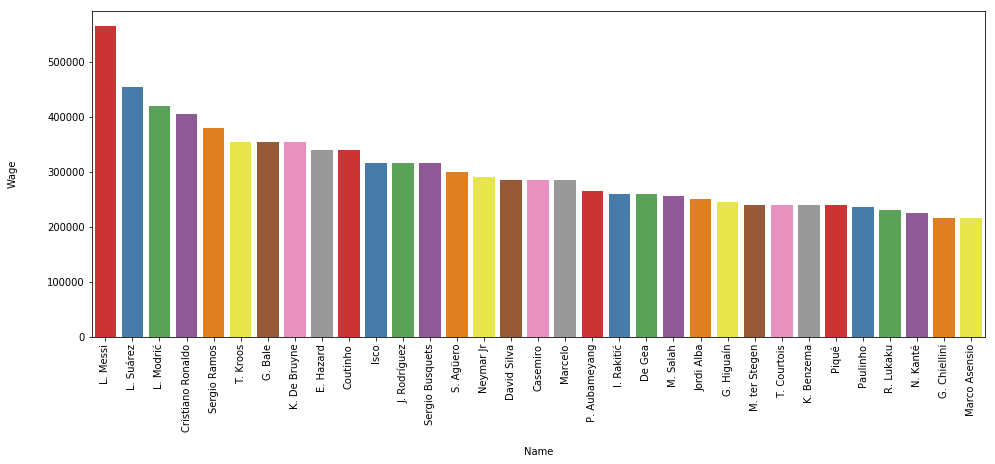

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Name', y='Wage', data=top_wage_player.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
plt.xticks(rotation=90)
plt.show()

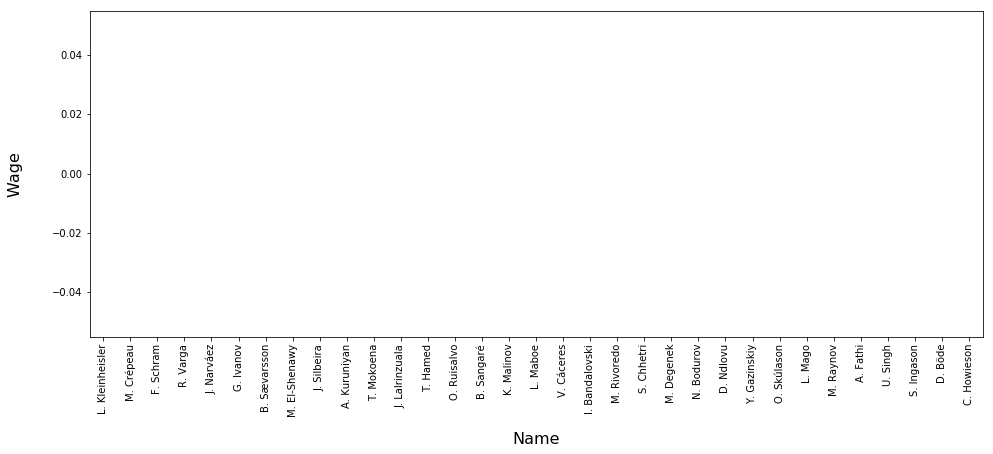

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Name', y='Wage', data=top_wage_player.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

As you can see, it contains the zero value, it makes no sense. So, we place them into the median of all players' wage.

In [13]:
# Clear the 0 wage with median
df['Wage'][df['Wage'] == 0] = df['Wage'].median()
top_wage_player=df.sort_values('Wage',ascending=False)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


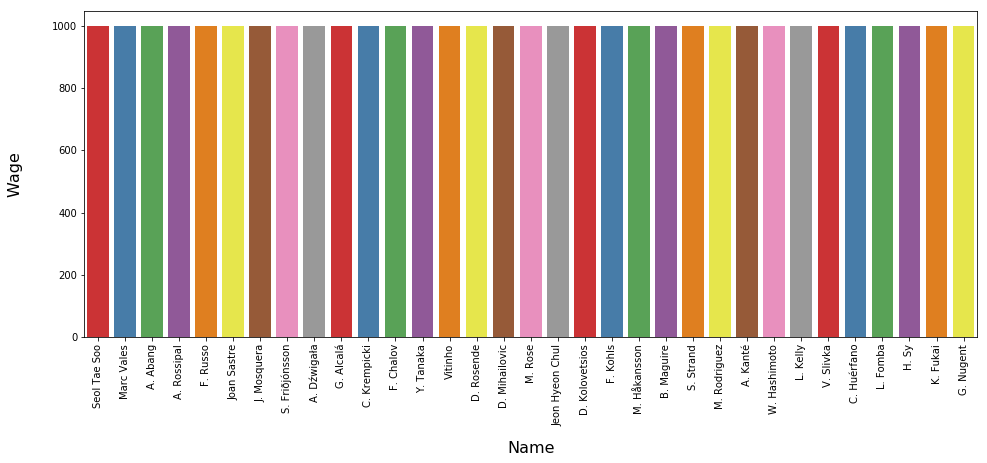

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Name', y='Wage', data=top_wage_player.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

For now, there is no NaN value and no zero value in Wage column. We can move on to check out the other variables.

## Variables

For the models' features (variables), we first check whether it contains the NaN values and take a glance that whether the range of its values make sense.

### Age

In [15]:
df['Age'].isnull().sum()

0

In [16]:
df['Age'].astype('category')

0        31
1        33
2        26
3        27
4        27
5        27
6        32
7        31
8        32
9        25
10       29
11       28
12       32
13       32
14       27
15       24
16       24
17       27
18       26
19       26
20       29
21       31
22       32
23       30
24       33
25       19
26       26
27       26
28       26
29       27
         ..
18177    18
18178    18
18179    17
18180    22
18181    17
18182    18
18183    44
18184    18
18185    19
18186    20
18187    19
18188    17
18189    18
18190    18
18191    18
18192    18
18193    18
18194    18
18195    18
18196    19
18197    18
18198    18
18199    18
18200    18
18201    18
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: category
Categories (29, int64): [16, 17, 18, 19, ..., 41, 42, 44, 45]

### Overall

In [17]:
df['Overall'].isnull().sum()

0

In [18]:
df['Overall'].astype('category')

0        94
1        94
2        92
3        91
4        91
5        91
6        91
7        91
8        91
9        90
10       90
11       90
12       90
13       90
14       89
15       89
16       89
17       89
18       89
19       89
20       89
21       89
22       89
23       89
24       89
25       88
26       88
27       88
28       88
29       88
         ..
18177    48
18178    48
18179    48
18180    48
18181    48
18182    48
18183    48
18184    48
18185    48
18186    47
18187    47
18188    47
18189    47
18190    47
18191    47
18192    47
18193    47
18194    47
18195    47
18196    47
18197    47
18198    47
18199    47
18200    47
18201    47
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: category
Categories (48, int64): [46, 47, 48, 49, ..., 90, 91, 92, 94]

### Potential

In [19]:
df['Potential'].isnull().sum()

0

In [20]:
df['Potential'].astype('category')

0        94
1        94
2        93
3        93
4        92
5        91
6        91
7        91
8        91
9        93
10       90
11       90
12       90
13       90
14       90
15       94
16       91
17       90
18       92
19       90
20       89
21       89
22       89
23       89
24       89
25       95
26       89
27       90
28       89
29       88
         ..
18177    69
18178    65
18179    64
18180    58
18181    66
18182    65
18183    48
18184    55
18185    59
18186    64
18187    59
18188    62
18189    61
18190    67
18191    65
18192    64
18193    64
18194    65
18195    67
18196    61
18197    61
18198    70
18199    69
18200    62
18201    68
18202    65
18203    63
18204    67
18205    66
18206    66
Name: Potential, Length: 18207, dtype: category
Categories (47, int64): [48, 50, 51, 52, ..., 92, 93, 94, 95]

### Value

Same as wage, value column also has special symbols, so we will do the same processing as wage column. Worthy to mention, some of the value column is million per units, so we also have to take care of the units.

In [21]:
df['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
5           €93M
6           €67M
7           €80M
8           €51M
9           €68M
10          €77M
11        €76.5M
12          €44M
13          €60M
14          €63M
15          €89M
16        €83.5M
17          €78M
18          €58M
19        €53.5M
20        €51.5M
21          €60M
22          €38M
23        €64.5M
24          €27M
25          €81M
26        €69.5M
27        €59.5M
28        €69.5M
29          €62M
          ...   
18177       €70K
18178       €50K
18179       €50K
18180       €40K
18181       €50K
18182       €50K
18183         €0
18184       €40K
18185       €50K
18186       €60K
18187       €40K
18188       €60K
18189       €60K
18190       €60K
18191       €50K
18192       €50K
18193       €50K
18194       €50K
18195       €60K
18196       €60K
18197       €60K
18198       €60K
18199       €70K
18200       €60K
18201       €60K
18202       €60K
18203       €60K
18204       €6

In [22]:
b = (df['Value'].str.split('€').str[1].str.split('M').str).len() == 2
millions = df['Value'].str.split('€').str[1].str.split('M')[b].str[0].astype('float64')
killions = df['Value'].str.split('€').str[1].str.split('M')[~b].str[0].str.split('K').str[0].astype('float64')

In [23]:
df['Value'][b] = millions * 1000000

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['Value'][~b] = killions * 1000

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df['Value']

0        1.105e+08
1          7.7e+07
2        1.185e+08
3          7.2e+07
4         1.02e+08
5          9.3e+07
6          6.7e+07
7            8e+07
8          5.1e+07
9          6.8e+07
10         7.7e+07
11        7.65e+07
12         4.4e+07
13           6e+07
14         6.3e+07
15         8.9e+07
16        8.35e+07
17         7.8e+07
18         5.8e+07
19        5.35e+07
20        5.15e+07
21           6e+07
22         3.8e+07
23        6.45e+07
24         2.7e+07
25         8.1e+07
26        6.95e+07
27        5.95e+07
28        6.95e+07
29         6.2e+07
           ...    
18177        70000
18178        50000
18179        50000
18180        40000
18181        50000
18182        50000
18183            0
18184        40000
18185        50000
18186        60000
18187        40000
18188        60000
18189        60000
18190        60000
18191        50000
18192        50000
18193        50000
18194        50000
18195        60000
18196        60000
18197        60000
18198       

We notice that there are also zero value in the Value column, which makes no sense. So, we alikely replace these values by the median of the column.

In [26]:
df['Value'][df['Value'] == 0] = df['Value'].median()
df['Value'] = df['Value'].astype('float64')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df['Value'].isnull().sum()

0

In [28]:
df['Value'].astype('category')

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
5         93000000.0
6         67000000.0
7         80000000.0
8         51000000.0
9         68000000.0
10        77000000.0
11        76500000.0
12        44000000.0
13        60000000.0
14        63000000.0
15        89000000.0
16        83500000.0
17        78000000.0
18        58000000.0
19        53500000.0
20        51500000.0
21        60000000.0
22        38000000.0
23        64500000.0
24        27000000.0
25        81000000.0
26        69500000.0
27        59500000.0
28        69500000.0
29        62000000.0
            ...     
18177        70000.0
18178        50000.0
18179        50000.0
18180        40000.0
18181        50000.0
18182        50000.0
18183       675000.0
18184        40000.0
18185        50000.0
18186        60000.0
18187        40000.0
18188        60000.0
18189        60000.0
18190        60000.0
18191        50000.0
18192        50000.0
18193        

### Preferred Foot

The variable, "Preferred Foot", only have two string value which are "Left" and "Right" so called binary categorical variable.

In [29]:
df['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
5        Right
6        Right
7        Right
8        Right
9        Right
10       Right
11       Right
12       Right
13        Left
14       Right
15        Left
16       Right
17        Left
18       Right
19        Left
20       Right
21       Right
22       Right
23       Right
24        Left
25       Right
26        Left
27       Right
28        Left
29       Right
         ...  
18177    Right
18178    Right
18179    Right
18180    Right
18181    Right
18182    Right
18183    Right
18184    Right
18185    Right
18186    Right
18187    Right
18188    Right
18189    Right
18190    Right
18191     Left
18192    Right
18193    Right
18194    Right
18195    Right
18196    Right
18197    Right
18198    Right
18199    Right
18200     Left
18201     Left
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [30]:
df['Preferred Foot'].astype('category').values

[Left, Right, Right, Right, Right, ..., Right, Right, Right, Right, Right]
Length: 18207
Categories (2, object): [Left, Right]

In [31]:
df['Preferred Foot'].isnull().sum()

48

As the aspect of the NaN value, we found there are 48 NaN values in this variable column. Because of small amount, compare to the total observations, we can just ignore these observations.

In [32]:
df = df[~df['Preferred Foot'].isnull()]

### Dummy Variables

In last section, Preferred Foot variable, 'Left' or 'Right' doesn't make any contribute to linear regression, so we use dummy variables for the Preferred Foot feature, which is also a binary variable. Then, we set preferred foot, left, as one for our models.

In [33]:
df = pd.concat([df, pd.get_dummies(df['Preferred Foot'])], axis=1)

### International Reputation

In [34]:
df['International Reputation'].isnull().sum()

0

In [35]:
df['International Reputation'].astype('category').values

[5.0, 5.0, 5.0, 4.0, 4.0, ..., 1.0, 1.0, 1.0, 1.0, 1.0]
Length: 18159
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

### Weak Foot

In [36]:
df['Weak Foot'].isnull().sum()

0

In [37]:
df['Weak Foot'].astype('category').values

[4.0, 4.0, 5.0, 3.0, 5.0, ..., 2.0, 2.0, 3.0, 3.0, 3.0]
Length: 18159
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

### Skill Moves

In [38]:
df['Skill Moves'].isnull().sum()

0

In [39]:
df['Skill Moves'].astype('category').values

[4.0, 5.0, 5.0, 1.0, 4.0, ..., 2.0, 2.0, 2.0, 2.0, 2.0]
Length: 18159
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

### Height

For the height, we normalize all feets into inches.

In [40]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
5         5'8
6         5'8
7         6'0
8         6'0
9         6'2
10        6'0
11        6'0
12        6'2
13        5'8
14        5'6
15       5'10
16        6'2
17        5'9
18        6'2
19        6'6
20        6'2
21        6'1
22        6'4
23        5'8
24        6'2
25       5'10
26        5'9
27        6'1
28       5'11
29        5'4
         ... 
18177    5'10
18178     6'0
18179     6'2
18180     6'1
18181    5'11
18182    5'10
18183     6'2
18184     6'1
18185    5'11
18186    5'10
18187    5'10
18188    5'10
18189    5'10
18190     5'9
18191    5'11
18192     6'1
18193     5'8
18194     6'3
18195     5'8
18196     5'7
18197    5'10
18198    5'11
18199     5'6
18200     5'9
18201     6'1
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18159, dtype: object

In [41]:
df['Height'].isnull().sum()

0

In [42]:
h = df['Height'].str.split('\'')
df['Height'] = h.str[0].astype('int64')*12 + h.str[1].astype('int64')

In [43]:
df['Height']

0        67
1        74
2        69
3        76
4        71
5        68
6        68
7        72
8        72
9        74
10       72
11       72
12       74
13       68
14       66
15       70
16       74
17       69
18       74
19       78
20       74
21       73
22       76
23       68
24       74
25       70
26       69
27       73
28       71
29       64
         ..
18177    70
18178    72
18179    74
18180    73
18181    71
18182    70
18183    74
18184    73
18185    71
18186    70
18187    70
18188    70
18189    70
18190    69
18191    71
18192    73
18193    68
18194    75
18195    68
18196    67
18197    70
18198    71
18199    66
18200    69
18201    73
18202    69
18203    75
18204    68
18205    70
18206    70
Name: Height, Length: 18159, dtype: int64

In [44]:
df['Height'].astype('category').values

[67, 74, 69, 76, 71, ..., 69, 75, 68, 70, 70]
Length: 18159
Categories (21, int64): [61, 62, 63, 64, ..., 78, 79, 80, 81]

### Weight

In [45]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
5        163lbs
6        146lbs
7        190lbs
8        181lbs
9        192lbs
10       176lbs
11       168lbs
12       172lbs
13       148lbs
14       159lbs
15       165lbs
16       196lbs
17       161lbs
18       187lbs
19       212lbs
20       168lbs
21       170lbs
22       203lbs
23       154lbs
24       187lbs
25       161lbs
26       157lbs
27       185lbs
28       172lbs
29       130lbs
          ...  
18177    163lbs
18178    176lbs
18179    163lbs
18180    172lbs
18181    134lbs
18182    165lbs
18183    190lbs
18184    179lbs
18185    159lbs
18186    174lbs
18187    161lbs
18188    148lbs
18189    165lbs
18190    176lbs
18191    168lbs
18192    165lbs
18193    146lbs
18194    187lbs
18195    141lbs
18196    146lbs
18197    141lbs
18198    154lbs
18199    150lbs
18200    157lbs
18201    168lbs
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18

In [46]:
df['Weight'] = df['Weight'].str.split('lbs').str[0].astype('int64')

In [47]:
df['Weight'].isnull().sum()

0

In [48]:
df['Weight'].astype('category').values

[159, 183, 150, 168, 154, ..., 134, 170, 148, 154, 176]
Length: 18159
Categories (57, int64): [110, 115, 117, 119, ..., 229, 234, 236, 243]

### Position

Then, there are several positions have been scored for each player. The score is from 0 to 100. We convert the string into float number and replace the NaN value with the median of each column.

In [49]:
position = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [50]:
df[position].isnull().sum().sum()

52962

In [51]:
df[position]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
5,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3
6,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,...,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3
7,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,...,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5
8,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,...,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Convert 45+2 into 47 (int64) and handle NaN values
for x in position:
    n = df[x][~df[x].isnull()].str.split('+')
    df[x] = n.str[0].astype('int64') + n.str[1].astype('int64')
    df[x][df[x].isnull()] = df[x].median()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [53]:
df[position]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,60.0,60.0,60.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,60.0,60.0,60.0,60.0,60.0,60.0,59.0,59.0,59.0,60.0
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,...,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
5,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,...,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0
6,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,...,85.0,84.0,84.0,84.0,85.0,82.0,74.0,74.0,74.0,82.0
7,92.0,92.0,92.0,91.0,92.0,92.0,92.0,91.0,90.0,90.0,...,74.0,73.0,73.0,73.0,74.0,71.0,68.0,68.0,68.0,71.0
8,76.0,76.0,76.0,73.0,74.0,74.0,74.0,73.0,74.0,74.0,...,84.0,87.0,87.0,87.0,84.0,87.0,90.0,90.0,90.0,87.0
9,60.0,60.0,60.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,60.0,60.0,60.0,60.0,60.0,60.0,59.0,59.0,59.0,60.0


In [54]:
df[position].isnull().sum().sum()

0

In [55]:
df[position].values

array([[90., 90., 90., ..., 49., 49., 61.],
       [94., 94., 94., ..., 56., 56., 64.],
       [87., 87., 87., ..., 50., 50., 63.],
       ...,
       [47., 47., 47., ..., 30., 30., 35.],
       [49., 49., 49., ..., 33., 33., 37.],
       [45., 45., 45., ..., 49., 49., 48.]])

### Crossing

In [56]:
df['Crossing'].isnull().sum()

0

In [57]:
df['Crossing'].astype('category').values

[84.0, 84.0, 79.0, 17.0, 93.0, ..., 34.0, 23.0, 25.0, 44.0, 41.0]
Length: 18159
Categories (89, float64): [5.0, 6.0, 7.0, 8.0, ..., 90.0, 91.0, 92.0, 93.0]

### Finishing

In [58]:
df['Finishing'].isnull().sum()

0

In [59]:
df['Finishing'].astype('category').values

[95.0, 94.0, 87.0, 13.0, 82.0, ..., 38.0, 52.0, 40.0, 50.0, 34.0]
Length: 18159
Categories (93, float64): [2.0, 4.0, 5.0, 6.0, ..., 92.0, 93.0, 94.0, 95.0]

### HeadingAccuracy

In [60]:
df['HeadingAccuracy'].isnull().sum()

0

In [61]:
df['HeadingAccuracy'].astype('category').values

[70.0, 89.0, 62.0, 21.0, 55.0, ..., 40.0, 52.0, 46.0, 39.0, 46.0]
Length: 18159
Categories (91, float64): [4.0, 5.0, 6.0, 7.0, ..., 91.0, 92.0, 93.0, 94.0]

### ShortPassing

In [62]:
df['ShortPassing'].isnull().sum()

0

In [63]:
df['ShortPassing'].astype('category').values

[90.0, 81.0, 84.0, 50.0, 92.0, ..., 49.0, 43.0, 38.0, 42.0, 48.0]
Length: 18159
Categories (85, float64): [7.0, 8.0, 11.0, 12.0, ..., 90.0, 91.0, 92.0, 93.0]

### Volleys

In [64]:
df['Volleys'].isnull().sum()

0

In [65]:
df['Volleys'].astype('category').values

[86.0, 87.0, 84.0, 13.0, 82.0, ..., 25.0, 36.0, 38.0, 40.0, 30.0]
Length: 18159
Categories (87, float64): [4.0, 5.0, 6.0, 7.0, ..., 87.0, 88.0, 89.0, 90.0]

### Dribbling

In [66]:
df['Dribbling'].isnull().sum()

0

In [67]:
df['Dribbling'].astype('category').values

[97.0, 88.0, 96.0, 18.0, 86.0, ..., 42.0, 39.0, 45.0, 51.0, 43.0]
Length: 18159
Categories (94, float64): [4.0, 5.0, 6.0, 7.0, ..., 94.0, 95.0, 96.0, 97.0]

### Curve

In [68]:
df['Curve'].isnull().sum()

0

In [69]:
df['Curve'].astype('category').values

[93.0, 81.0, 88.0, 21.0, 85.0, ..., 30.0, 32.0, 38.0, 34.0, 40.0]
Length: 18159
Categories (89, float64): [6.0, 7.0, 8.0, 9.0, ..., 91.0, 92.0, 93.0, 94.0]

### FKAccuracy

In [70]:
df['FKAccuracy'].isnull().sum()

0

In [71]:
df['FKAccuracy'].astype('category').values

[94.0, 76.0, 87.0, 19.0, 83.0, ..., 34.0, 20.0, 27.0, 32.0, 34.0]
Length: 18159
Categories (90, float64): [3.0, 4.0, 6.0, 7.0, ..., 91.0, 92.0, 93.0, 94.0]

### LongPassing

In [72]:
df['LongPassing'].isnull().sum()

0

In [73]:
df['LongPassing'].astype('category').values

[87.0, 77.0, 78.0, 51.0, 91.0, ..., 45.0, 25.0, 28.0, 32.0, 44.0]
Length: 18159
Categories (84, float64): [9.0, 10.0, 11.0, 12.0, ..., 89.0, 90.0, 91.0, 93.0]

### BallControl

In [74]:
df['BallControl'].isnull().sum()

0

In [75]:
df['BallControl'].astype('category').values

[96.0, 94.0, 95.0, 42.0, 91.0, ..., 43.0, 40.0, 44.0, 52.0, 51.0]
Length: 18159
Categories (90, float64): [5.0, 8.0, 9.0, 10.0, ..., 93.0, 94.0, 95.0, 96.0]

### Acceleration

In [76]:
df['Acceleration'].isnull().sum()

0

In [77]:
df['Acceleration'].astype('category').values

[91.0, 89.0, 94.0, 57.0, 78.0, ..., 54.0, 41.0, 70.0, 61.0, 57.0]
Length: 18159
Categories (86, float64): [12.0, 13.0, 14.0, 15.0, ..., 94.0, 95.0, 96.0, 97.0]

### SprintSpeed

In [78]:
df['SprintSpeed'].isnull().sum()

0

In [79]:
df['SprintSpeed'].astype('category').values

[86.0, 91.0, 90.0, 58.0, 76.0, ..., 57.0, 39.0, 69.0, 60.0, 55.0]
Length: 18159
Categories (85, float64): [12.0, 13.0, 14.0, 15.0, ..., 93.0, 94.0, 95.0, 96.0]

### Agility

In [80]:
df['Agility'].isnull().sum()

0

In [81]:
df['Agility'].astype('category').values

[91.0, 87.0, 96.0, 60.0, 79.0, ..., 60.0, 38.0, 50.0, 52.0, 55.0]
Length: 18159
Categories (81, float64): [14.0, 15.0, 18.0, 19.0, ..., 93.0, 94.0, 95.0, 96.0]

### Reactions

In [82]:
df['Reactions'].isnull().sum()

0

In [83]:
df['Reactions'].astype('category').values

[95.0, 96.0, 94.0, 90.0, 91.0, ..., 49.0, 40.0, 47.0, 21.0, 51.0]
Length: 18159
Categories (68, float64): [21.0, 30.0, 31.0, 32.0, ..., 93.0, 94.0, 95.0, 96.0]

### Balance

In [84]:
df['Balance'].isnull().sum()

0

In [85]:
df['Balance'].astype('category').values

[95.0, 70.0, 84.0, 43.0, 77.0, ..., 76.0, 52.0, 58.0, 71.0, 63.0]
Length: 18159
Categories (81, float64): [16.0, 17.0, 18.0, 19.0, ..., 93.0, 94.0, 95.0, 96.0]

## Features Selection

After we clean up the dataset, we can start to choose the features of the model. we first investigate the high correlated value with target variable.

In [86]:
wage_corr_seq = (df.corr()['Wage']).sort_values(ascending=False).drop('Wage')
wage_corr_seq

Value                       0.858216
International Reputation    0.668855
Overall                     0.572363
Reactions                   0.496137
Potential                   0.486711
RCM                         0.436270
LCM                         0.436270
CM                          0.436270
Composure                   0.419800
RS                          0.396013
LS                          0.396013
ST                          0.396013
RAM                         0.392832
CAM                         0.392832
LAM                         0.392832
LM                          0.390451
RM                          0.390451
LF                          0.385969
RF                          0.385969
CF                          0.385969
LW                          0.370526
RW                          0.370526
Special                     0.348012
LWB                         0.337174
RWB                         0.337174
LDM                         0.317811
CDM                         0.317811
R

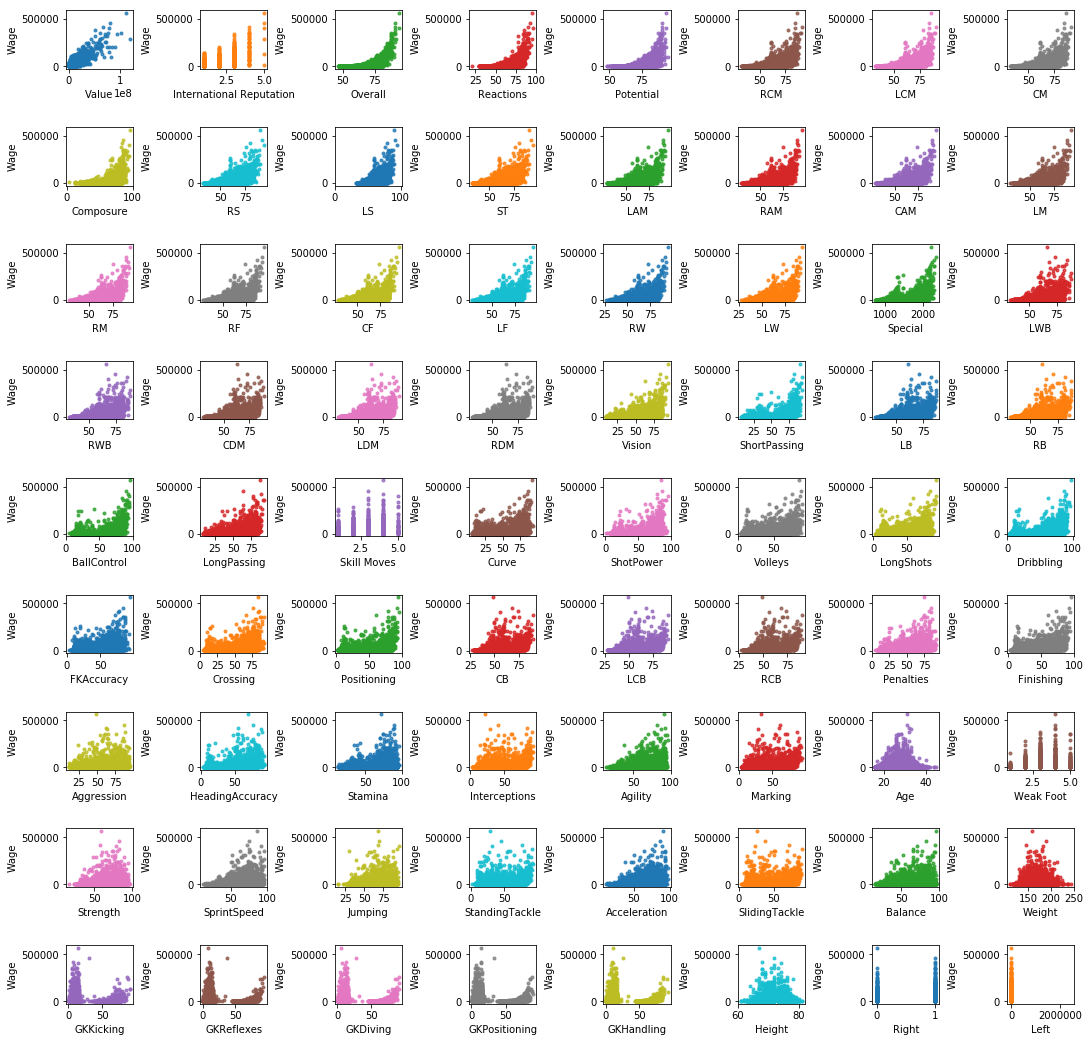

In [87]:
fig, axes = plt.subplots(nrows=9, ncols=8, figsize=(10,10))
plt.subplots_adjust(left = -0.5, bottom=-0.5, hspace=1.0, wspace=1.0)

corr_to_wage = pd.Series()
for col in df.columns.values[1:]:
    if (((col!='Wage') & (col!='Name') & (col!='Preferred Foot'))):
        corr_to_wage[col] = df['Wage'].corr(df[col])
abs_corr_to_wage = corr_to_wage.abs().sort_values(ascending=False)
corr_to_wage = corr_to_wage.loc[abs_corr_to_wage.index]

for i in range(9):
    for j in range(8):
        sns.regplot(x=corr_to_wage.index.values[i*8+j], y='Wage', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
#         title = 'correlation='+str(corr_to_wage[i*5+j])
#         axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

We choose several features for constructing different models and investigate which model is the best one. We first choose ten highest correlation with wage, which are 'Value','International Reputation','Overall', 'Reactions', 'Potential','RCM','Composure','RS'.

### Significant

In order to research whether the features are significant. We use t-test for calculating p value for this task.

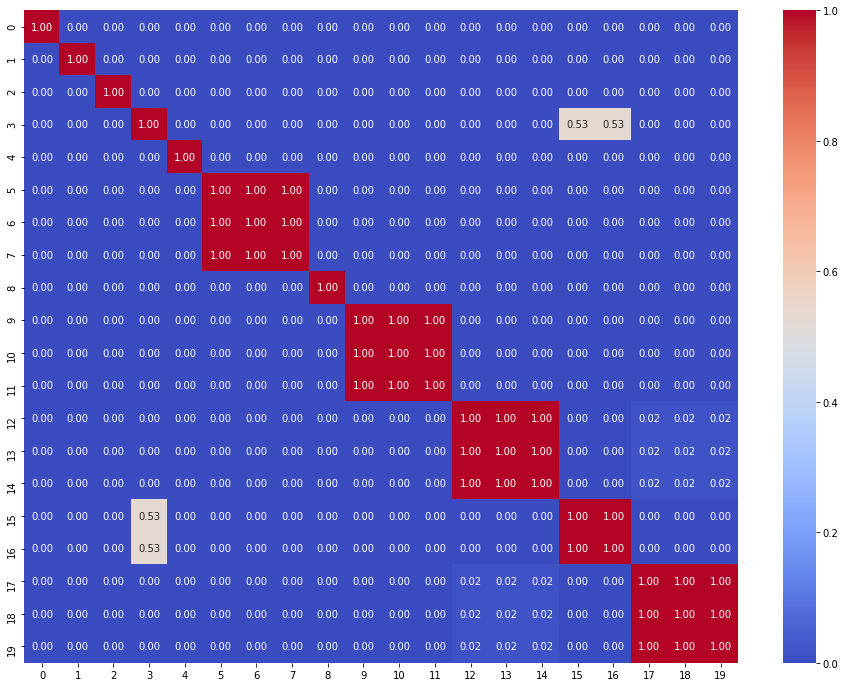

In [88]:
allFeatures = df[abs_corr_to_wage.index[:20]].columns
matrix = [[0 for x in range(len(allFeatures))] for y in range(len(allFeatures))] 
for i in range(len(allFeatures)):
    for j in range(len(allFeatures)):
        t, p = stats.ttest_ind(df[allFeatures[i]], df[allFeatures[j]])
        matrix[i][j] = p
sign = pd.DataFrame(data=matrix)
plt.figure(figsize=(16,12))
sns.heatmap(data=sign,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Based on the results of correlation with wage and the p value between features, we finally choose the following features: 'Value','International Reputation','Overall', 'Reactions', 'Potential','RCM','Composure','RS'.

In [89]:
features = ['Value','International Reputation','Overall', 'Reactions', 'Potential','RCM','Composure','RS']

## Modeling - ordinary least square

### Training and Testing

In [90]:
def buildLRModel(f):
    scores = []
    models = []
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    train, test = train_test_split(df, test_size=0.3, shuffle=True)
    
    for i in range(0, len(f)):
        training_feature = f[0:i+1]
        target = 'Wage'
        train_X.append(train[training_feature])
        train_Y.append(train[target])
        test_X.append(test[training_feature])
        test_Y.append(test[target])
        model = sm.OLS(train[target], train[training_feature])
        result = model.fit()
        score = result.rsquared
        
        
        models.append(result)
        scores.append(score)
    return [scores, models, train_X, train_Y, test_X, test_Y]

In [91]:
[scores, models, train_X, train_Y, test_X, test_Y] = buildLRModel(features)

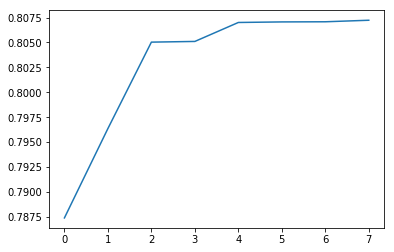

In [92]:
plt.plot(scores)

We use the modelIndex linear regression library to train our model and calculate the accuracy with testing data as the diagram shown above. Then, we choose the model which have more than 5 features and also has minimum R square below.

In [93]:
modelIndex = scores.index(max(scores))
modelIndex

7

In [94]:
print("model number: " + str(modelIndex) + ", R^2: " + str(scores[modelIndex]))

model number: 7, R^2: 0.8072324104362285


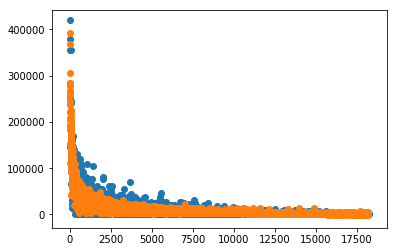

In [95]:
# plt.scatter(train_Y[modelIndex].index.values, train_Y[modelIndex])
plt.scatter(test_Y[modelIndex].index.values, test_Y[modelIndex])
plt.scatter(train_Y[modelIndex].index.values, models[modelIndex].predict())

We show the results of the test data comparing target variable with the predict result, as the diagram above. The distribution seems corresponding to each other.

### Cross Validation

In [96]:
def buildLRModelCV(f):
    scores_CV = []
    
    for i in range(0, len(f)):
        training_feature = f[0:i+1]
        target = 'Wage'
        model = LinearRegression()
        score = cross_val_score(model, df[training_feature], df[target], cv=5, scoring='homogeneity_score')
        scores_CV.append(sum(score)/len(score))
    return scores_CV

In [97]:
scores_CV = buildLRModelCV(features)

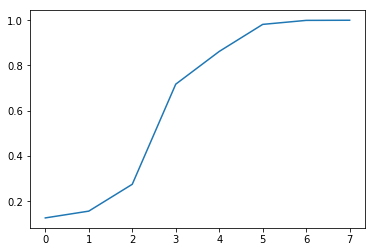

In [98]:
plt.plot(scores_CV)

In [99]:
modelIndex_CV = scores_CV.index(max(scores_CV))
modelIndex_CV


7

The scores_CV shows the average cross validation scores of these ten models. We can clearly see that the score increasing drastically after we using more than two features in a model. As the result, we can select the model which can explain the observed data better.

###  AIC, BIC and adjusted R^2

In [100]:
models[modelIndex].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     6649.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:09:26   Log-Likelihood:            -1.3604e+05
No. Observations:               12711   AIC:                         2.721e+05
Df Residuals:                   12703   BIC:                         2.722e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Value                        0.0030   2.08e-05    143.339      0.000       0.003       0.003
International Reputation  9841.4479    323.795     30.394      0.000    9206.762    1.05e+04
Overall                    110.8659     32.752      3.385      0.001      46.668     175.064
Reactions                   -3.9312     20.800     -0.189      0.850     -44.703      36.841
Potential                 -185.6878     17.688    -10.498      0.000    -220.360    -151.016
RCM                          5.4691     21.001      0.260      0.795     -35.696      46.634
Composure                   14.2302     12.464      1.142      0.254     -10.201      38.661
RS                         -56.7351     17.840     -3.180      0.001     -91.704     -21.766
==============================================================================
Omnibus:                     6949.727   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1130483.321
Skew:                           1.576   Prob(JB):                         0.00
Kurtosis:                      49.093   Cond. No.                     2.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
for i in range(len(features)):
    model = models[i]
    print("model " + str(i) + " AIC: " + str(model.aic))

model 0 AIC: 273331.0198383357
model 1 AIC: 272785.01997394813
model 2 AIC: 272233.63825515495
model 3 AIC: 272231.08296531823
model 4 AIC: 272108.33661311655
model 5 AIC: 272106.6437914405
model 6 AIC: 272107.68478280783
model 7 AIC: 272099.56877520017


Comparing the AIC between the choosing model and the others, we find that the model 7 has the minimum AIC. We say that model 7 can predict on new data better

## Modeling - Logistical Regression

### Training and Testing

In [102]:
sortedWage=df.sort_values('Wage',ascending=False)
bound = sortedWage['Wage'][int(len(sortedWage)*0.4)]
df['newWage'] = pd.Series(np.where(df['Wage'].values > bound, 1, 0), df['Skill Moves'].index)

In [103]:
def buildLogiRModel(f):
    scores = []
    models = []
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    
    for i in range(0, len(f)):
        train, test = train_test_split(df, test_size=0.3, shuffle=True)
        training_feature = f[0:i+1]
        target = 'newWage'
        train_X.append(train[training_feature])
        train_Y.append(train[target])
        test_X.append(test[training_feature])
        test_Y.append(test[target])
        model = LogisticRegression()
        result = model.fit(train[training_feature], train[target])
        score = result.score(test[training_feature], test[target])
    
        models.append(result)
        scores.append(score)
    return [scores, models, train_X, train_Y, test_X, test_Y]

In [104]:
[scores, models, train_X, train_Y, test_X, test_Y] = buildLogiRModel(features)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

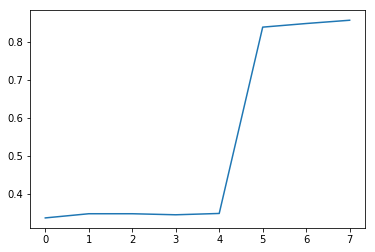

In [105]:
plt.plot(scores)

In [106]:
modelIndex = scores.index(max(scores))

In [107]:
print("model number: " + str(modelIndex) + ", Mean accuracy: " + str(scores[modelIndex]))

model number: 7, Mean accuracy: 0.8577459618208517


### Cross Validation

In [108]:
def buildLogiRModelCV(f):
    scores_CV = []
    
    for i in range(0, len(f)):
        training_feature = f[0:i+1]
        target = 'newWage'
        model = LogisticRegression()
#         score = cross_val_score(model, df[training_feature], df[target], cv=5, scoring='homogeneity_score')
        score = cross_val_score(model, df[training_feature], df[target], cv=5)
        scores_CV.append(sum(score)/len(score))
    return scores_CV

In [109]:
scores_CV = buildLogiRModelCV(features)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

In [110]:
scores_CV

[0.34462249160795905,
 0.34462249160795905,
 0.40793105202634605,
 0.41106895458621395,
 0.40578406606433115,
 0.43717186767729893,
 0.7941480018881217,
 0.8035640587404961]

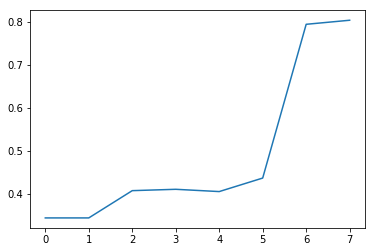

In [111]:
plt.plot(scores_CV)

In [112]:
modelIndex_CV = scores_CV.index(max(scores_CV))

In [113]:
modelIndex_CV

7

In [114]:
modelIndex_CV
features[:modelIndex_CV+1]

['Value',
 'International Reputation',
 'Overall',
 'Reactions',
 'Potential',
 'RCM',
 'Composure',
 'RS']

# Multi-colinearity and step-wise regression

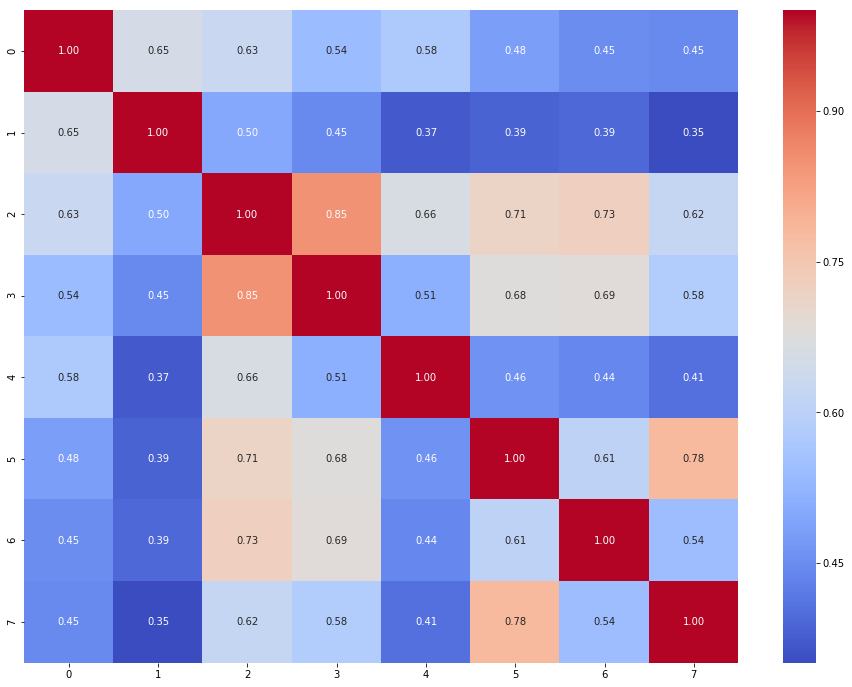

In [115]:
corr = np.corrcoef(df[features], rowvar=0)
corrMatrix = pd.DataFrame(data=corr)
plt.figure(figsize=(16,12))
sns.heatmap(data=corrMatrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [116]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns

In [117]:
vif.round(1)

,VIF Factor,features
0,1.8,Value
1,15.8,International Reputation
2,524.8,Overall
3,186.6,Reactions
4,177.3,Potential
5,180.0,RCM
6,60.7,Composure
7,127.7,RS


## Step-wise Regression

In [118]:
stepFeatures = df.columns.drop(['Wage', 'Name', 'Preferred Foot', 'Right'])

In [119]:
def stepwise_selection_pvalue(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        if not changed:
            break
    return included

In [120]:
stepwiseResult_pavlue = stepwise_selection_pvalue(df[stepFeatures], df['Wage'])
print('resulting features determind by p-value:')
print(stepwiseResult_pavlue)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  ShortPassing                   with p-value 0.0
Add  GKReflexes                     with p-value 0.0
Add  International Reputation       with p-value 0.0
Add  Potential                      with p-value 0.0
Add  Value                          with p-value 0.0
Add  newWage                        with p-value 2.98494e-217
Add  Skill Moves                    with p-value 1.41424e-19
Add  Overall                        with p-value 1.12419e-07
Add  Age                            with p-value 3.71683e-13
Add  SlidingTackle                  with p-value 1.43122e-09
Add  BallControl                    with p-value 6.14437e-07
Add  FKAccuracy                     with p-value 4.27156e-05
Add  Reactions                      with p-value 0.00349533
Add  LW                             with p-value 0.0013919
Add  RM                             with p-value 0.000117867
Add  RW                             with p-value 9.25947e-06
Add  LM                             with p-value 0.000117867
resul

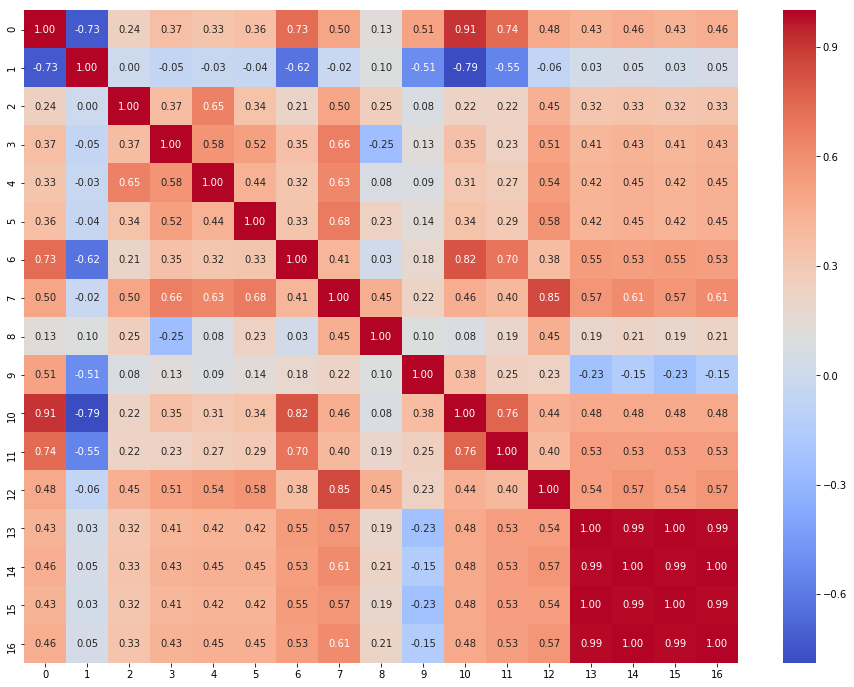

In [121]:
stepwiseCorr_pvalue = np.corrcoef(df[stepwiseResult_pavlue], rowvar=0)
corrMatrix_pvalue = pd.DataFrame(data=stepwiseCorr_pvalue)
plt.figure(figsize=(16,12))
sns.heatmap(data=corrMatrix_pvalue,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [122]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[stepwiseResult_pavlue].values, i) for i in range(df[stepwiseResult_pavlue].shape[1])]
vif["features"] = df[stepwiseResult_pavlue].columns
vif.round(1)

D:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,153.900000,ShortPassing
1,19.200000,GKReflexes
2,17.400000,International Reputation
3,397.000000,Potential
4,2.800000,Value
5,2.400000,newWage
6,41.200000,Skill Moves
7,1094.700000,Overall
8,100.000000,Age
9,19.900000,SlidingTackle


In [123]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
target = 'Wage'
train_X = train[stepwiseResult_pavlue]
train_Y = train[target]
test_X = test[stepwiseResult_pavlue]
test_Y = test[target]
model = sm.OLS(train_Y, train_X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     3523.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:10:41   Log-Likelihood:            -1.3521e+05
No. Observations:               12711   AIC:                         2.705e+05
Df Residuals:                   12696   BIC:                         2.706e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ShortPassing               -28.1285     18.279     -1.539      0.124     -63.959       7.702
GKReflexes                 -11.8218     16.010     -0.738      0.460     -43.204      19.561
International Reputation  8793.3990    319.158     27.552      0.000    8167.801    9418.997
Potential                   75.5597     25.036      3.018      0.003      26.485     124.634
Value                        0.0029   2.61e-05    112.744      0.000       0.003       0.003
newWage                   6932.2138    237.839     29.147      0.000    6466.014    7398.414
Skill Moves              -1192.4312    232.620     -5.126      0.000   -1648.401    -736.461
Overall                   -335.1915     44.558     -7.523      0.000    -422.532    -247.851
Age                        351.1687     35.065     10.015      0.000     282.435     419.902
SlidingTackle               60.0054      7.938      7.559      0.000      44.445      75.566
BallControl                 52.3667     21.162      2.475      0.013      10.886      93.847
FKAccuracy                 -50.1232      8.827     -5.678      0.000     -67.426     -32.821
Reactions                  -61.6738     19.305     -3.195      0.001     -99.514     -23.834
LW                         198.1979     51.273      3.866      0.000      97.694     298.702
RM                        -169.7344     52.998     -3.203      0.001    -273.618     -65.851
RW                         198.1979     51.273      3.866      0.000      97.694     298.702
LM                        -169.7344     52.998     -3.203      0.001    -273.618     -65.851
==============================================================================
Omnibus:                     9254.192   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2368094.606
Skew:                           2.463   Prob(JB):                         0.00
Kurtosis:                      69.686   Cond. No.                     3.91e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
def stepwise_selection_rsquared(X, y, 
                       initial_list=[],
                       verbose=True):
    
    included = list(initial_list)
    counter = 0
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_rsquared = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_rsquared[new_column] = model.rsquared
        best_rsquared = new_rsquared.max()
        if counter < 30:
            best_feature = new_rsquared.argmax()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with R squared {:.6}'.format(best_feature, best_rsquared))
            counter = counter + 1
                
        if not changed:
            break
    return included

In [125]:
stepwiseResult_rsquare = stepwise_selection_rsquared(df[stepFeatures], df['Wage'])
print('resulting features determind by r squared:')
print(stepwiseResult_rsquare)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Add  Value                          with R squared 0.736535
Add  International Reputation       with R squared 0.756915
Add  newWage                        with R squared 0.76726
Add  Potential                      with R squared 0.769736
Add  Overall                        with R squared 0.77053
Add  CB                             with R squared 0.771403
Add  Age                            with R squared 0.77205
Add  SlidingTackle                  with R squared 0.772265
Add  Skill Moves                    with R squared 0.772629
Add  ST                             with R squared 0.772757
Add  FKAccuracy                     with R squared 0.77307
Add  Reactions                      with R squared 0.773194
Add  BallControl                    with R squared 0.773297
Add  LongPassing                    with R squared 0.77346
Add  Stamina                        with R squared 0.77357
Add  Crossing                       with R squared 0.773675
Add  Balance                        with R squ

In [126]:
len(stepwiseResult_rsquare)

30

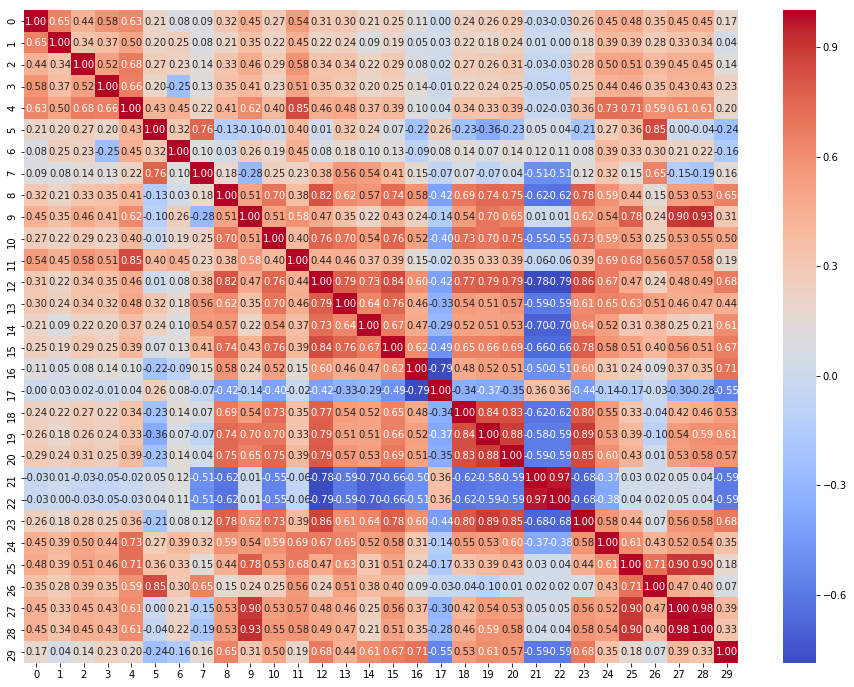

In [127]:
stepwiseCorr_r = np.corrcoef(df[stepwiseResult_rsquare], rowvar=0)
corrMatrix_r = pd.DataFrame(data=stepwiseCorr_r)
plt.figure(figsize=(16,12))
sns.heatmap(data=corrMatrix_r,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [128]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[stepwiseResult_rsquare].values, i) for i in range(df[stepwiseResult_rsquare].shape[1])]
vif["features"] = df[stepwiseResult_rsquare].columns
vif.round(1)

,VIF Factor,features
0,3.1,Value
1,17.9,International Reputation
2,2.9,newWage
3,767.9,Potential
4,1331.6,Overall
5,1699.9,CB
6,140.7,Age
7,137.1,SlidingTackle
8,43.9,Skill Moves
9,2458.4,ST


In [129]:
def buildLRModelCV_r(f):
    scores_CV_r = []
    
    for i in range(0, len(f)):
        training_feature = f[0:i+1]
        target = 'Wage'
        model = LinearRegression()
        score = cross_val_score(model, df[training_feature], df[target], cv=5, scoring='homogeneity_score')
        scores_CV_r.append(sum(score)/len(score))
    return scores_CV_r

In [130]:
scores_CV_r = buildLRModelCV_r(stepwiseResult_rsquare)

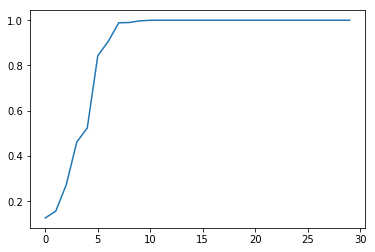

In [131]:
plt.plot(scores_CV_r)

In [132]:
print("Cross Validation Score: " + str(max(scores_CV_r)))

Cross Validation Score: 0.9999999999999998


# Interaction effects

We use the stepwise regression model select by p-value to exam the interaction effects. We first investigate the original model and then choose first two features product to last two features for a new model.

In [133]:
stepwiseResult_pavlue

['ShortPassing',
 'GKReflexes',
 'International Reputation',
 'Potential',
 'Value',
 'newWage',
 'Skill Moves',
 'Overall',
 'Age',
 'SlidingTackle',
 'BallControl',
 'FKAccuracy',
 'Reactions',
 'LW',
 'RM',
 'RW',
 'LM']

In [134]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)

In [135]:
result.params

ShortPassing                 -28.128490
GKReflexes                   -11.821814
International Reputation    8793.398989
Potential                     75.559684
Value                          0.002938
newWage                     6932.213818
Skill Moves                -1192.431184
Overall                     -335.191541
Age                          351.168692
SlidingTackle                 60.005412
BallControl                   52.366697
FKAccuracy                   -50.123232
Reactions                    -61.673837
LW                           198.197875
RM                          -169.734431
RW                           198.197875
LM                          -169.734431
dtype: float64

In [136]:
model = sm.OLS(train['Wage'], train[stepwiseResult_pavlue])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     3666.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:12:08   Log-Likelihood:            -1.3578e+05
No. Observations:               12711   AIC:                         2.716e+05
Df Residuals:                   12696   BIC:                         2.717e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ShortPassing               -19.1427     19.074     -1.004      0.316     -56.531      18.245
GKReflexes                 -16.3548     16.650     -0.982      0.326     -48.992      16.283
International Reputation  9337.9727    328.473     28.428      0.000    8694.117    9981.829
Potential                   73.8015     26.078      2.830      0.005      22.685     124.918
Value                        0.0030   2.53e-05    116.778      0.000       0.003       0.003
newWage                   6820.9056    246.899     27.626      0.000    6336.946    7304.865
Skill Moves               -949.0583    244.053     -3.889      0.000   -1427.438    -470.678
Overall                   -341.1989     46.473     -7.342      0.000    -432.293    -250.105
Age                        364.6939     36.369     10.028      0.000     293.405     435.983
SlidingTackle               58.4850      8.297      7.049      0.000      42.221      74.749
BallControl                 29.5390     22.015      1.342      0.180     -13.614      72.692
FKAccuracy                 -42.2023      9.214     -4.580      0.000     -60.263     -24.142
Reactions                  -72.3852     20.366     -3.554      0.000    -112.307     -32.464
LW                         199.8918     53.344      3.747      0.000      95.329     304.454
RM                        -168.9251     55.105     -3.066      0.002    -276.938     -60.912
RW                         199.8918     53.344      3.747      0.000      95.329     304.454
LM                        -168.9251     55.105     -3.066      0.002    -276.938     -60.912
==============================================================================
Omnibus:                     9728.424   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2045945.244
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      64.910   Cond. No.                     4.00e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [137]:
dfNoSpace = df.rename(columns={'Skill Moves': 'SkillMoves', 'International Reputation': 'InternationalReputation'})

In [138]:
stepwiseResult_pvalue_nospace = pd.Series(stepwiseResult_pavlue).str.replace('Skill Moves', 'SkillMoves')
stepwiseResult_pvalue_nospace = stepwiseResult_pvalue_nospace.str.replace('International Reputation', 'InternationalReputation')
stepwiseResult_pvalue_nospace = stepwiseResult_pvalue_nospace.append(pd.Series(['Wage']))

In [142]:
formu = 'Wage ~ Value*InternationalReputation+Reactions*SkillMoves+Potential+Overall+Age++SlidingTackle'

In [143]:
model_inter = smf.ols(formula=formu,data=dfNoSpace[stepwiseResult_pvalue_nospace]).fit()

In [144]:
model_inter.params

Intercept                       -31232.529836
Value                                0.001438
InternationalReputation           5946.167480
Value:InternationalReputation        0.000494
Reactions                            3.945631
SkillMoves                        -139.730392
Reactions:SkillMoves                -1.385411
Potential                          111.820345
Overall                            253.227048
Age                                121.676090
SlidingTackle                       29.680364
dtype: float64

In [145]:
model_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     6215.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:14:48   Log-Likelihood:            -1.9384e+05
No. Observations:               18159   AIC:                         3.877e+05
Df Residuals:                   18148   BIC:                         3.878e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -3.123e+04   2058.410    -15.173      0.000   -3.53e+04   -2.72e+04
Value                             0.0014   5.12e-05     28.056      0.000       0.001       0.002
InternationalReputation        5946.1675    297.013     20.020      0.000    5363.993    6528.342
Value:InternationalReputation     0.0005   1.47e-05     33.547      0.000       0.000       0.001
Reactions                         3.9456     31.083      0.127      0.899     -56.979      64.870
SkillMoves                     -139.7304    752.786     -0.186      0.853   -1615.262    1335.802
Reactions:SkillMoves             -1.3854     11.587     -0.120      0.905     -24.098      21.327
Potential                       111.8203     30.490      3.667      0.000      52.057     171.584
Overall                         253.2270     37.120      6.822      0.000     180.469     325.985
Age                             121.6761     35.455      3.432      0.001      52.181     191.171
SlidingTackle                    29.6804      3.797      7.816      0.000      22.238      37.123
==============================================================================
Omnibus:                     7625.455   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1614769.086
Skew:                           0.870   Prob(JB):                         0.00
Kurtosis:                      49.164   Cond. No.                     5.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regularization

We also use the above original model for examing the regularization by using fit_regularized method. The parameter, L1_w1, is 1, which means it is ridge fit for the model.

In [146]:
def regularization(lambd):
    train, test = train_test_split(df, test_size=0.3, shuffle=True)
    target = 'Wage'
    model_regular = Ridge(alpha=lambd)
    result = model_regular.fit(train[stepwiseResult_pavlue], train[target])
    score = result.score(test[stepwiseResult_pavlue], test[target])
#     print("R^2: " + str(result.score(test[stepwiseResult_pavlue], test[target])))
    return score

In [147]:
score_lambda = []
for i in range(1,50):
#     print(regularization(i))
    score_lambda.append(regularization(i))

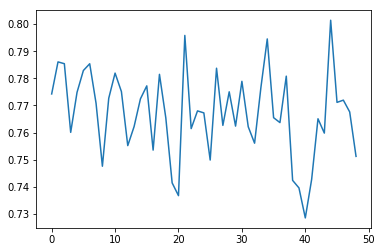

In [148]:
plt.plot(score_lambda)

In [149]:
print("Maximum R^2: " + str(max(score_lambda)) + " when lambda = " + str(score_lambda.index(max(score_lambda))))

Maximum R^2: 0.8014271120906582 when lambda = 44
